In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("customer_sales_data.csv")

In [3]:
df.head(10)

,Customer_ID,Product,Region,Quantity,Unit_Price,Purchase_Date,Total_Price
0,CUST_0038,Headphones,North,1,867,2023-07-23,867
1,CUST_0006,Phone,North,2,683,2023-08-26,1366
2,CUST_0007,Laptop,East,1,354,2023-12-24,354
3,CUST_0019,Smartwatch,West,1,590,2023-06-06,590
4,CUST_0030,Tablet,North,4,853,2023-12-19,3412
5,CUST_0087,Laptop,South,4,419,2023-11-14,1676
6,CUST_0023,Laptop,South,1,416,2023-07-29,416
7,CUST_0009,Phone,South,4,531,2023-05-02,2124
8,CUST_0073,Headphones,East,2,661,2023-11-10,1322
9,CUST_0004,Smartwatch,North,2,143,2023-03-18,286


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer_ID    500 non-null    object
 1   Product        500 non-null    object
 2   Region         500 non-null    object
 3   Quantity       500 non-null    int64 
 4   Unit_Price     500 non-null    int64 
 5   Purchase_Date  500 non-null    object
 6   Total_Price    500 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 27.5+ KB
None


In [8]:
print(df.isnull().sum())

Customer_ID      0
Product          0
Region           0
Quantity         0
Unit_Price       0
Purchase_Date    0
Total_Price      0
dtype: int64


In [9]:
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Customer_ID    500 non-null    object        
 1   Product        500 non-null    object        
 2   Region         500 non-null    object        
 3   Quantity       500 non-null    int64         
 4   Unit_Price     500 non-null    int64         
 5   Purchase_Date  500 non-null    datetime64[ns]
 6   Total_Price    500 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 27.5+ KB
None


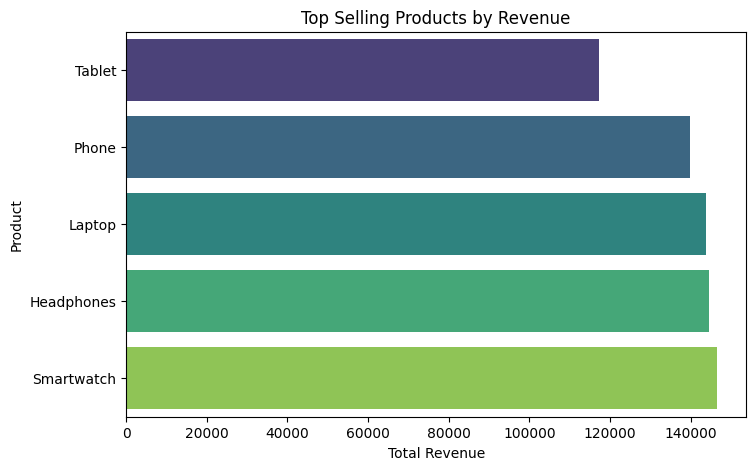

In [12]:
product_sales = df.groupby("Product")["Total_Price"].sum().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=product_sales, y=product_sales.index,palette='viridis',hue=product_sales.index,legend=False)
plt.title("Top Selling Products by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product")
plt.show()

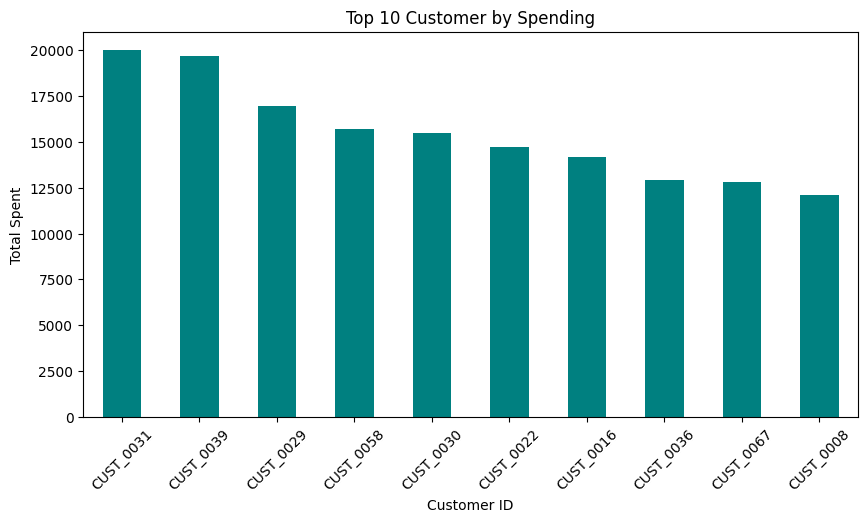

In [14]:
top_customers = df.groupby("Customer_ID")["Total_Price"].sum().sort_values(ascending=False).head(10)

top_customers.plot(kind='bar',figsize=(10,5),color='teal')
plt.title("Top 10 Customer by Spending")
plt.xlabel("Customer ID")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)
plt.show()

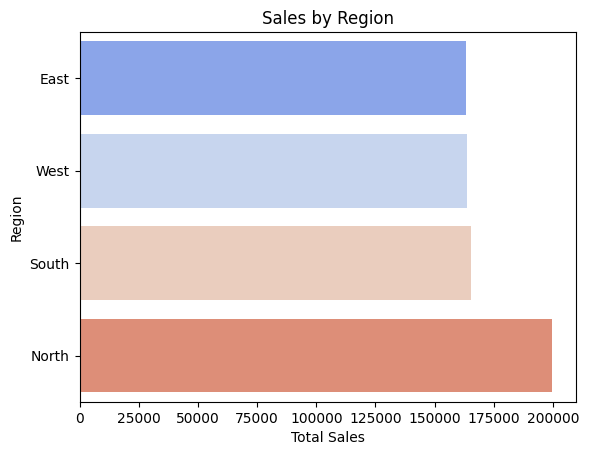

In [18]:
region_sales = df.groupby("Region")["Total_Price"].sum().sort_values()

sns.barplot(x=region_sales,y=region_sales.index,palette='coolwarm',hue=region_sales.index,legend=False)
plt.title("Sales by Region")
plt.xlabel("Total Sales")
plt.ylabel("Region")
plt.show()

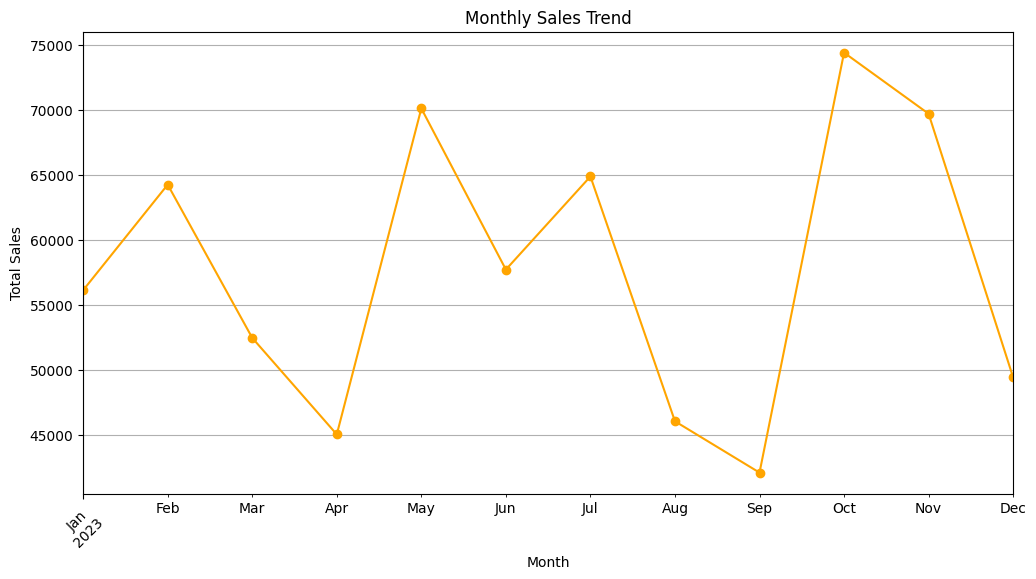

In [19]:
df['Month'] = df['Purchase_Date'].dt.to_period('M')
monthly_sales = df.groupby("Month")["Total_Price"].sum()

monthly_sales.plot(kind='line',figsize=(12,6),marker='o',color='orange')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [24]:
repeat_customer = df.groupby("Customer_ID")["Purchase_Date"].nunique()
repeat_count = (repeat_customer > 1).sum()
repeat_customer_ids = repeat_customer.index.tolist()

print(f"Repeated Customers:{repeat_count} out of {df["Customer_ID"].nunique()}")
print(repeat_customer_ids[:])

Repeated Customers:94 out of 98
['CUST_0001', 'CUST_0002', 'CUST_0003', 'CUST_0004', 'CUST_0005', 'CUST_0006', 'CUST_0007', 'CUST_0008', 'CUST_0009', 'CUST_0010', 'CUST_0011', 'CUST_0012', 'CUST_0013', 'CUST_0014', 'CUST_0015', 'CUST_0016', 'CUST_0017', 'CUST_0018', 'CUST_0019', 'CUST_0020', 'CUST_0021', 'CUST_0022', 'CUST_0023', 'CUST_0024', 'CUST_0025', 'CUST_0026', 'CUST_0027', 'CUST_0028', 'CUST_0029', 'CUST_0030', 'CUST_0031', 'CUST_0032', 'CUST_0033', 'CUST_0034', 'CUST_0035', 'CUST_0036', 'CUST_0037', 'CUST_0038', 'CUST_0039', 'CUST_0041', 'CUST_0042', 'CUST_0043', 'CUST_0044', 'CUST_0046', 'CUST_0047', 'CUST_0048', 'CUST_0049', 'CUST_0050', 'CUST_0051', 'CUST_0052', 'CUST_0053', 'CUST_0054', 'CUST_0055', 'CUST_0056', 'CUST_0057', 'CUST_0058', 'CUST_0059', 'CUST_0060', 'CUST_0061', 'CUST_0062', 'CUST_0063', 'CUST_0064', 'CUST_0065', 'CUST_0066', 'CUST_0067', 'CUST_0068', 'CUST_0069', 'CUST_0070', 'CUST_0071', 'CUST_0072', 'CUST_0073', 'CUST_0074', 'CUST_0075', 'CUST_0076', 'CUST